### Если потребуется запустить notebook в Colab можно выполнить данную ячейку, чтобы избежать проблем с импортами библиотек (но должно работать и без нее)

In [ ]:
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install random

### Вариант 3

Проверить теорему Линдеберга-Леви на распределении хи-квадрат: chi2(mu)

### Импорт библиотек

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

### Создадим выборку размером 1млн объектов из распределения хи-квадрат с мат.ожиданием=15

In [2]:
chi2_dist = scipy.stats.chi2(15)

chi2_dist_sample = chi2_dist.rvs(size=1_000_000)

### Выведем значения мат.ожидания и стандартного отклонения полученного распределения хи-квадрат

In [4]:
chi2_mean = round(chi2_dist_sample.mean(), 5)
chi2_std = round(chi2_dist_sample.std(), 5)
print('chi2_mean:', chi2_mean)
print('chi2_std:', chi2_std)

chi2_mean: 14.99973
chi2_std: 5.47627


### Построим график функции плотности  и гистограмму полученного распределения хи-квадрат

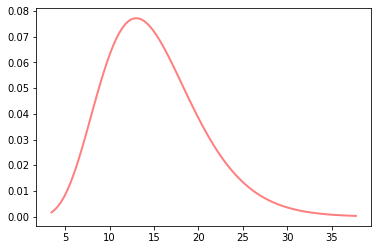

In [5]:
x_values = np.linspace(chi2_dist.ppf(0.001), chi2_dist.ppf(0.999), 100)

plt.plot(x_values, chi2_dist.pdf(x_values), 'r-', lw=2, alpha=0.5)
None

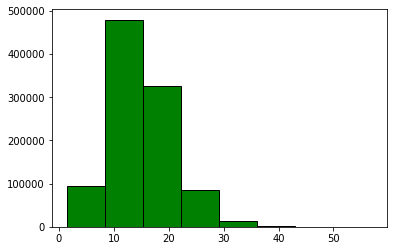

In [6]:
plt.hist(chi2_dist_sample, color='green', edgecolor='black', bins=8)
None

#### Можно увидеть, что графики соответствуют тем, которые должны быть у распределения хи-квардрат с мат.ожиданием=15

### Создадим выборку размером 1млн объектов из нормального распределения c средним=0 и стандартным отклонением=chi2_std

#### согласно теореме Линдеберга-Леви, распределение средних выборочных построенного нами распределения хи-квадрат должно приближаться к данному распределению

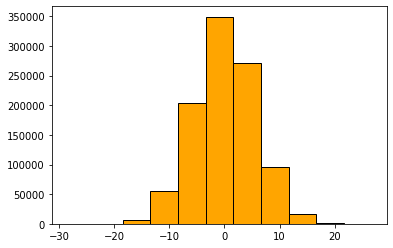

In [8]:
"""
np.random.normal(mu, sigma, size)
генерирует выборку размера size из нормальнго распределения

принимает три параметра:
mu - математическое ожидание
sigma - стандартное отклонение
size - количество генерируемых объектов
"""

norm_dist = np.random.normal(0, chi2_std, 1_000_000)
plt.hist(norm_dist, color='orange', edgecolor='black', bins=11)


None

### Проверим ЦПТ в форме Линдеберга-Леви для распределения хи-квадрат с мат.ожиданием=15

In [9]:
"""
CLT_calc(n, sample, mu, mini_sample_count=100000)
генерирует 100000(по умолчанию) выборок размера n и вычисляет для них значение выражения

1/sqrt(n) * sum(Xi - mu), i = 0..n

для проверки условия теоремы Линдеберга-Леви.

принимает 4 параметра:
n - размер случайной выборки
sample - множество объектов, из которого формируются выборки
mu - мат.ожидание на множестве sample
mini_sample_count - количество генерируемых выборок (не обязательный) 100000 по умолчанию

возвращает объект типа list
"""
def CLT_calc(n, sample, mu, mini_sample_count=100_000):
    mini_sample_means = []
    for _ in range(mini_sample_count):
        mini_sample = np.random.choice(sample, size=n) - mu
        mini_sample_means.append(mini_sample.sum() * 1/(n**0.5))
        
    return mini_sample_means

#### С ростом объема случайных выборок распределение средних этих выборок должно приближаться к нормальному с средним = 0 и стандартным отклонением = 5.47627

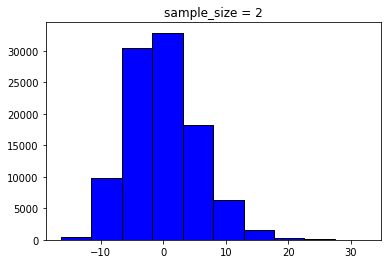

Mean: -0.03378
Std: 5.4704


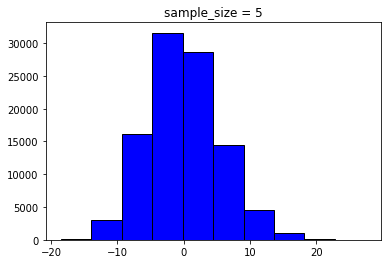

Mean: 0.0242
Std: 5.4733


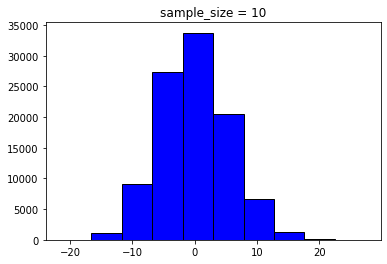

Mean: -0.00433
Std: 5.4796


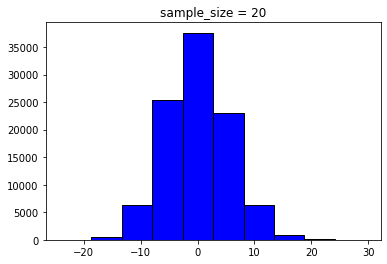

Mean: 0.01294
Std: 5.46642


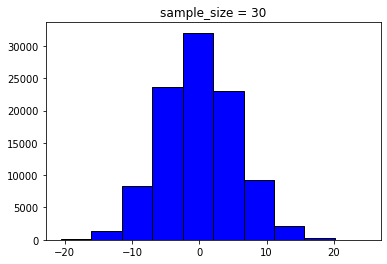

Mean: 0.0088
Std: 5.46665


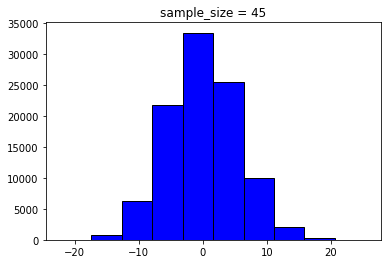

Mean: -0.01465
Std: 5.46297


In [11]:
"""
samlple_sizes - размеры случайных подвыборок из бета-распределения

итерируетмся по ним и для каждого из размеров выборки 
проверяем соответствие распределения средних этих выборок нормальному 
при помощи построения гистограммы и 
вычисления среднего и стандартного отклонения полученного распределения 

"""
sample_sizes = [2, 5, 10, 20, 30, 45]

for sample_size in sample_sizes:
    sample_means = CLT_calc(sample_size, chi2_dist_sample, chi2_mean)
    plt.hist(sample_means, color='blue', edgecolor='black', bins=10)
    plt.title(f'sample_size = {sample_size}')
    plt.show()
    print('Mean:', round(np.array(sample_means).mean(), 5))
    print('Std:', round(np.array(sample_means).std(), 5))


### Можно увидеть, как c ростом размера случайных подвыборок из распределения хи-квадрат, распределение их средних приближается к нормальному с средним=0 и стандартным отклонением=5.47627, что согласуется с теоремой Линдеберга-Леви.